In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import time
from bs4 import BeautifulSoup
import re
import json

### Read JSON directly to Pandas

In [2]:
user_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\user.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        user_data.append(line_contents)

In [3]:
user_data = pd.DataFrame(user_data)

In [4]:
print(user_data.columns)
print(user_data.shape)

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')
(1637138, 22)


In [5]:
business_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\business.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        business_data.append(line_contents)

In [6]:
business_data = pd.DataFrame(business_data)

In [7]:
business_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [8]:
print(business_data.columns)
print(business_data.shape)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')
(192609, 14)


In [9]:
review_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\review.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        review_data.append(line_contents)

In [10]:
review_data = pd.DataFrame(review_data)

In [11]:
print(review_data.columns)
print(review_data.shape)

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')
(6685900, 9)


In [12]:
print(len(review_data['business_id'].unique()))
print(len(review_data['user_id'].unique()))

192606
1637138


### Geocoding the business data
We would like to check how is our data (Yelp) is distributed geographically

In [13]:
import geopandas as gp
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns 
sns.set()

In [15]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [16]:
from shapely.geometry import Point

In [17]:
# Creating point coordinates from lat and long
business_data['location_coordinates'] = list(zip(business_data.longitude, business_data.latitude))
business_data['location_coordinates'] = business_data['location_coordinates'].apply(Point)

In [18]:
geo_business_data = gp.GeoDataFrame(business_data, geometry='location_coordinates')

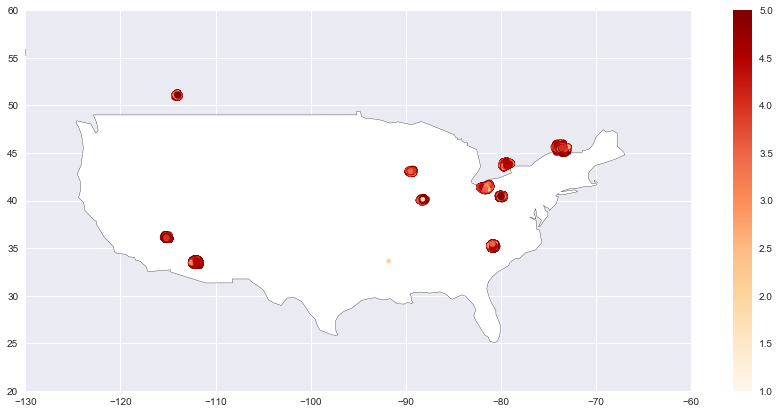

In [19]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_business_data.plot(ax = ax,cmap='OrRd', column='stars',legend = True,markersize =business_data['stars']*10)
ax.set(xlim=(-130, -60), ylim=(20,60))
plt.gcf().set_size_inches(15,7)
plt.show()

Restaurants data is not spread across evenly but seems to be concentrated in specific regions and the geocoding seems to be a bit off. Lets investigate further

** Extracting restaurants from the business dataset ** <br>
We can extract this either from column name or category

In [52]:
business_data.columns
business_data.dtypes

address                  object
attributes               object
business_id              object
categories               object
city                     object
hours                    object
is_open                   int64
latitude                float64
longitude               float64
name                     object
postal_code              object
review_count              int64
stars                   float64
state                    object
location_coordinates     object
dtype: object

In [21]:
business_data['name'] = business_data['name'].astype(str)
business_data['categories'] = business_data['categories'].astype(str)

In [22]:
business_data['name'] = business_data['name'].str.lower()
business_data['categories'] = business_data['categories'].str.lower()

In [23]:
print('The number of enteries having string:restaurant in its name column: ', \
      len(business_data.loc[business_data['name'].map(lambda x: bool(re.search('restaurant',x))),:]))

This number of rows have string restaurant in its name column:  4842


Rows which don't have 'restaurant' string in it:

In [24]:
business_data.loc[-(business_data['name'].map(lambda x: bool(re.search('restaurant',x)))),'name'].head()

0         arizona biltmore golf club
3    farmers insurance - paul lorenz
4                queen city plumbing
5                      the ups store
6                   edgeworxx studio
Name: name, dtype: object

In [25]:
print('The number of rows having string:restaurant in its categories column: ', \
      len(business_data.loc[(business_data['categories'].map(lambda x: bool(re.search('restaurant',x)))),'name']))

This number of rows have string restaurant in its categories column:  59387


Which is more than rows which have restaurant in it's name column. This happens because not all restaurant would have 'restaurant' in it's name lile: Joe's Pizza or Taco Bell. We will be using column categories to find the data. Lets first check out columns which don't have category as restaurant

In [26]:
business_data.loc[-(business_data['categories'].map(lambda x: bool(re.search('restaurant',x)))),'categories'].head()

0                                    golf, active life
3                        insurance, financial services
4    plumbing, shopping, local services, home servi...
5    shipping centers, couriers & delivery services...
6                           beauty & spas, hair salons
Name: categories, dtype: object

In [27]:
filtered_business_data = business_data.loc[(business_data['categories'].map(lambda x: bool(re.search('restaurant',x)))),:]

In [28]:
print('We now have ',np.round(len(filtered_business_data)*100/len(business_data),2),'% of the whole data')

We now have  30.83 % of the whole data


In [30]:
filtered_business_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,location_coordinates
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"specialty food, restaurants, dim sum, imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,emerald chinese restaurant,L5R 3E7,128,2.5,ON,POINT (-79.65228890900001 43.6054989743)
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"sushi bars, restaurants, japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,musashi japanese restaurant,28210,170,4.0,NC,POINT (-80.859132 35.092564)
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"restaurants, breakfast & brunch, mexican, taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,taco bell,85016,18,3.0,AZ,POINT (-112.0285876 33.4951941)
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"italian, restaurants, pizza, chicken wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,marco's pizza,44060,16,4.0,OH,POINT (-81.359556 41.70852)
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"restaurants, italian",Las Vegas,None,0,36.100016,-115.128529,carluccio's tivoli gardens,89119,40,4.0,NV,POINT (-115.1285285 36.1000163)


In [49]:
# Creating point coordinates from lat and long
filtered_business_data['location_coordinates'] = list(zip(filtered_business_data.longitude, filtered_business_data.latitude))
filtered_business_data['location_coordinates'] = filtered_business_data['location_coordinates'].apply(Point)

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
geo_filtered_business_data = gp.GeoDataFrame(filtered_business_data, geometry='location_coordinates')

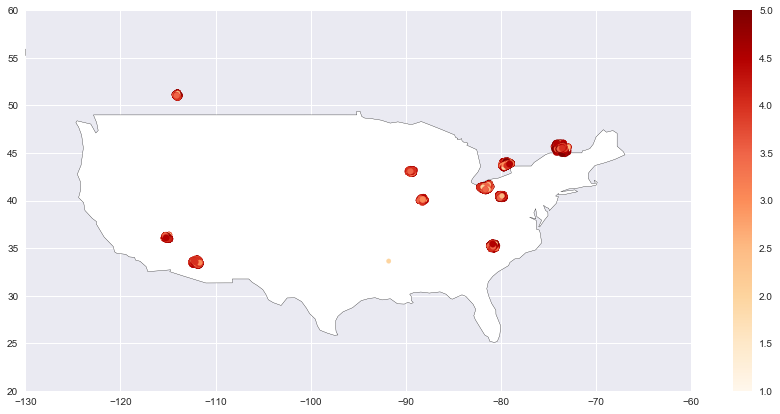

In [51]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_filtered_business_data.plot(ax = ax,cmap='OrRd', column='stars',legend = True,markersize =filtered_business_data['stars']*10)
ax.set(xlim=(-130, -60), ylim=(20,60))
plt.gcf().set_size_inches(15,7)
plt.show()

Merging filtered business data with the reviews data

In [34]:
filtered_business_data['business_id'] = filtered_business_data['business_id'].astype('category')

C:\Users\Sanchayni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
review_data['business_id'] = review_data['business_id'].astype('category')

In [36]:
Merged_data = filtered_business_data.merge(review_data, how = 'left', on= 'business_id')

In [39]:
len(Merged_data['business_id'].unique())

59387

In [ ]:
# Merged_data.to_csv('yelp_merged_data.csv', sep=',', encoding='utf-8')
# Merged_data_json = Merged_data.to_json(orient='index')
#with open('yelp_merged_data.json', 'w') as outfile:
#    json.dump(Merged_data_json, outfile)

In [48]:
len(Merged_data['user_id'].unique())

1148135